### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the parematers for matplotlib for visuala treat
plt.rcParams['axes.labelsize'] = 15.
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['figure.figsize'] = [15.,8.]
plt.rcParams['legend.fontsize'] = 13.

In [3]:
# Import Dataset
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA Univariate and Bivariate Analysis

In [4]:
df.shape

(303, 14)

In [5]:
df.size

4242

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### There is no missing value in the dataset

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

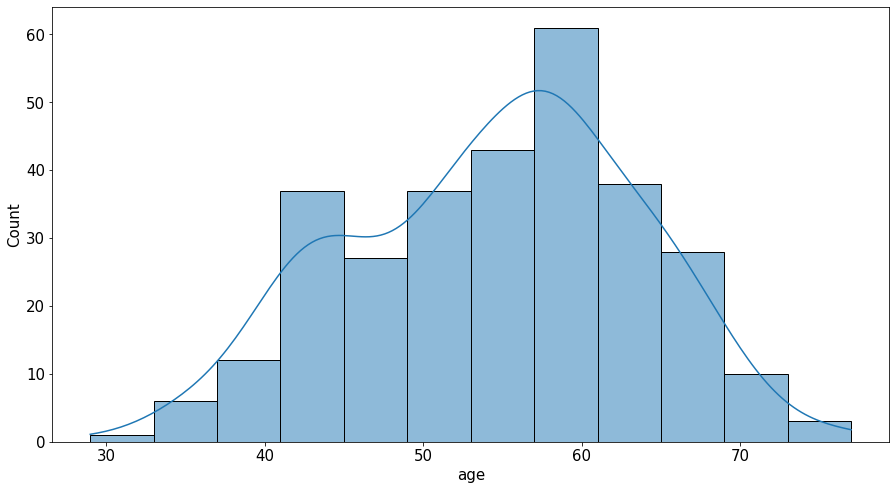

In [10]:
sns.histplot(x=df["age"], kde=True, palette="magma");

### Mostly the the age group Having Heart Disease is between 50 to 70

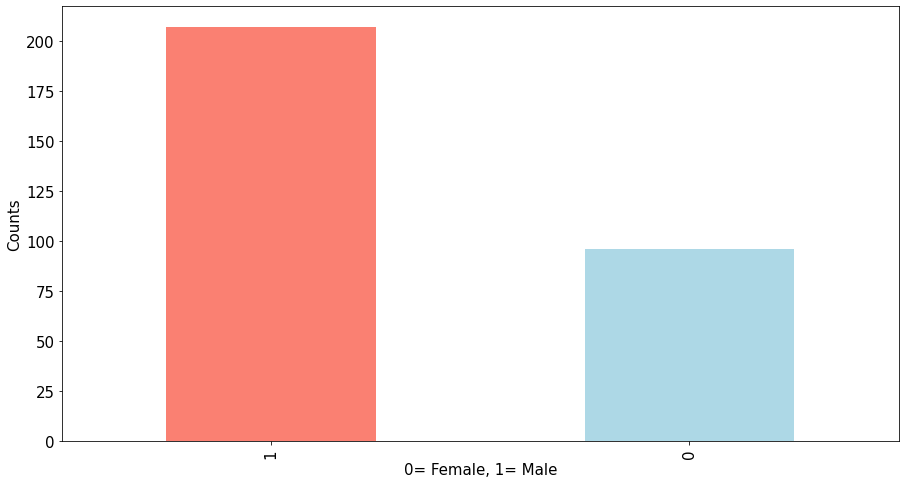

In [11]:
df.sex.value_counts().plot(kind="bar",color=["Salmon","lightblue"], xlabel="0= Female, 1= Male", ylabel="Counts");

## Respective to the age, male counts are more compare to female

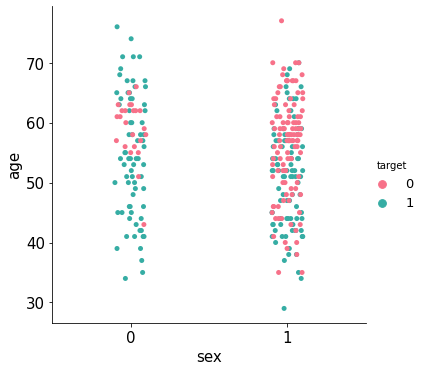

In [12]:
sns.catplot(data=df, x="sex", y="age", hue="target", palette="husl");

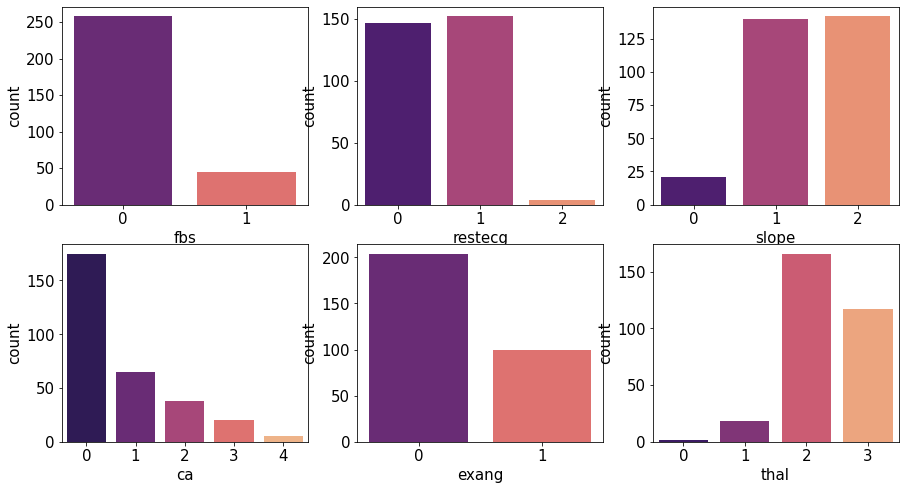

In [13]:
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.countplot(data=df,x='fbs' ,palette='magma')
plt.subplot(2,3,2)
sns.countplot(data=df,x='restecg',palette='magma')
plt.subplot(2,3,3)
sns.countplot(data=df,x='slope',palette='magma')
plt.subplot(2,3,4)
sns.countplot(data=df,x='ca',palette='magma')
plt.subplot(2,3,5)
sns.countplot(data=df,x='exang',palette='magma')
plt.subplot(2,3,6)
sns.countplot(data=df,x='thal',palette='magma');

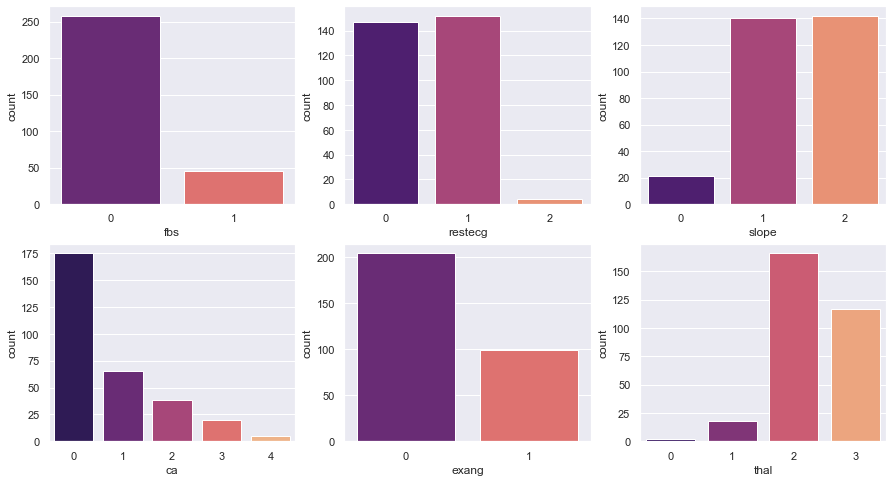

In [14]:
#plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.countplot(data=df,x='fbs',palette='magma')
plt.subplot(2,3,2)
sns.countplot(data=df,x='restecg',palette='magma')
plt.subplot(2,3,3)
sns.countplot(data=df,x='slope',palette='magma')
plt.subplot(2,3,4)
sns.countplot(data=df,x='ca',palette='magma')
plt.subplot(2,3,5)
sns.countplot(data=df,x='exang',palette='magma')
plt.subplot(2,3,6)
sns.countplot(data=df,x='thal',palette='magma');

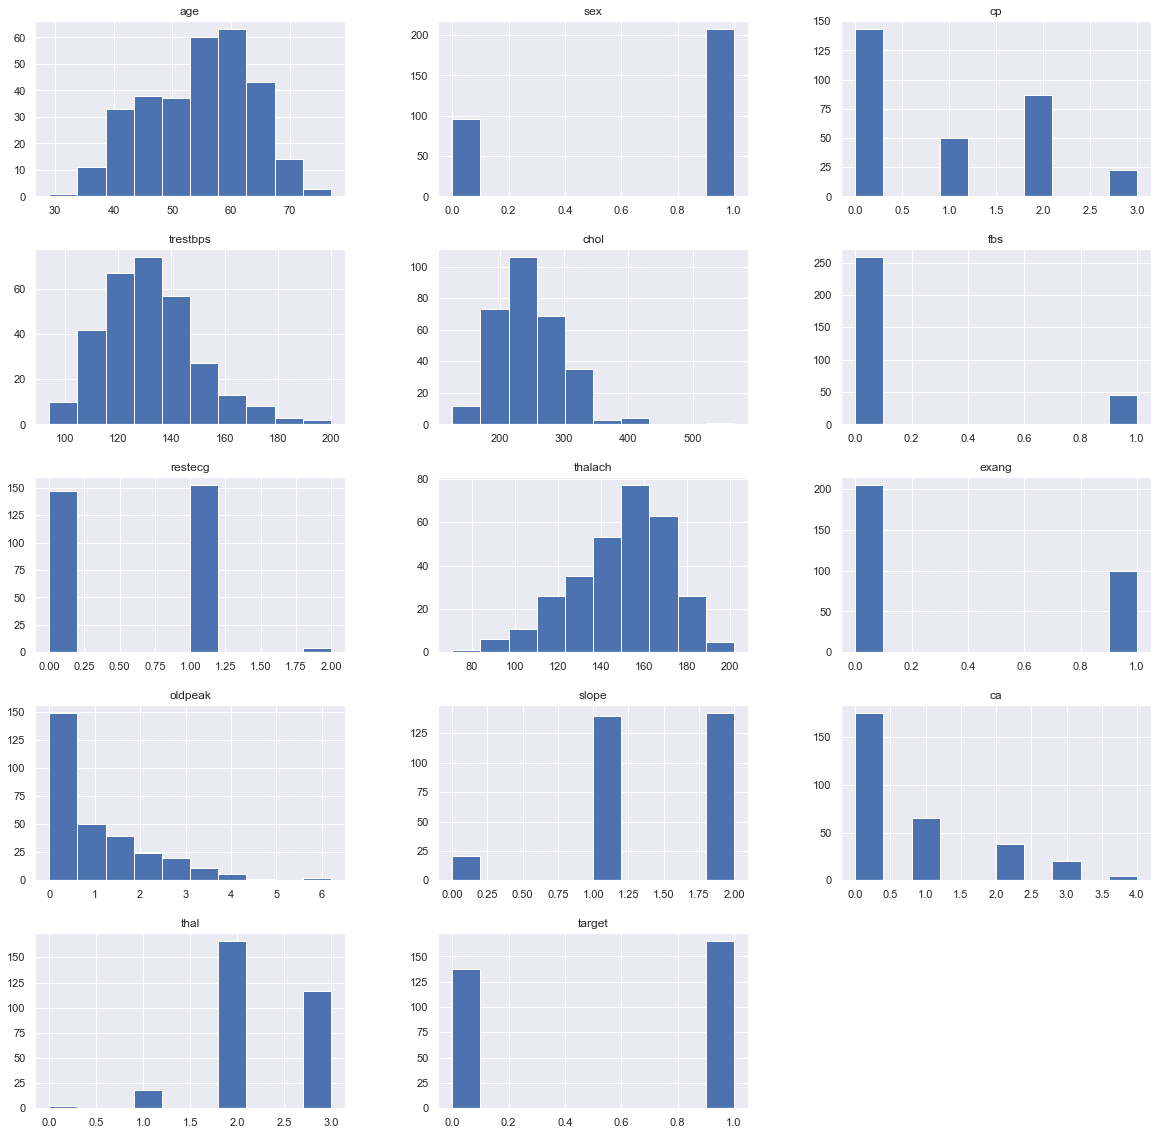

In [15]:
df.hist(figsize=(20,20), layout=(5,3));

## Analysing the relationship

cp - chest pain type:

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

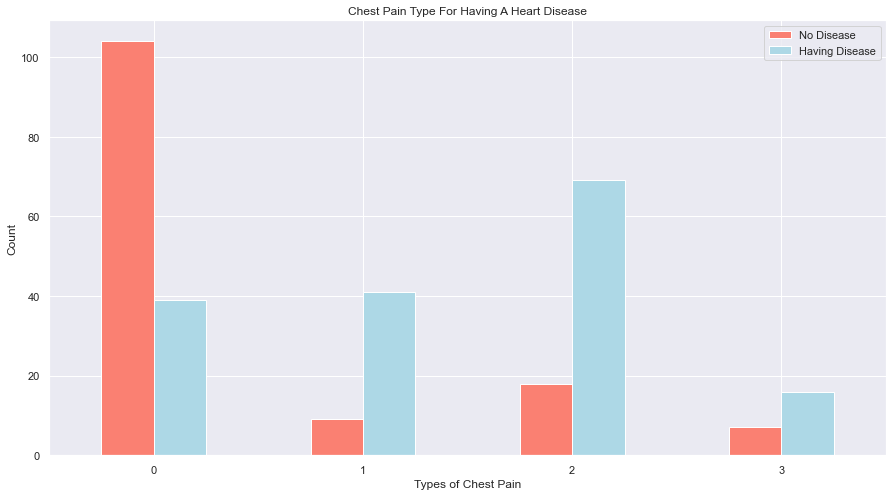

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["Salmon","lightblue"])
plt.xlabel("Types of Chest Pain")
plt.ylabel("Count")
plt.title("Chest Pain Type For Having A Heart Disease")
plt.xticks(rotation=0)
plt.legend(["No Disease","Having Disease"]);

### Type3 is having less cases but the the problility of having a heart disease is high

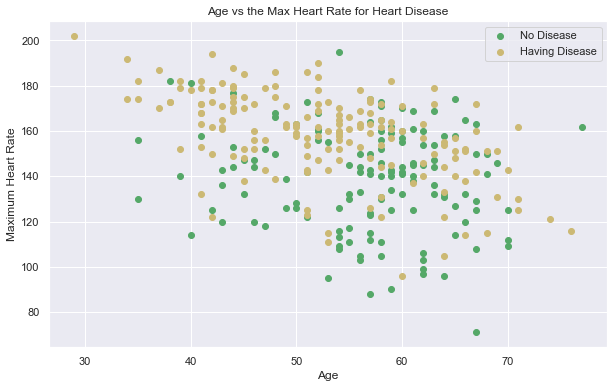

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "g")
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='y');
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age vs the Max Heart Rate for Heart Disease")
plt.legend(["No Disease", "Having Disease"]);

## Person Having Heart Rate Above 140 most likely to have a heart disease...where the the age group is considered as 40 to 70 

In [18]:
df.shape

(303, 14)

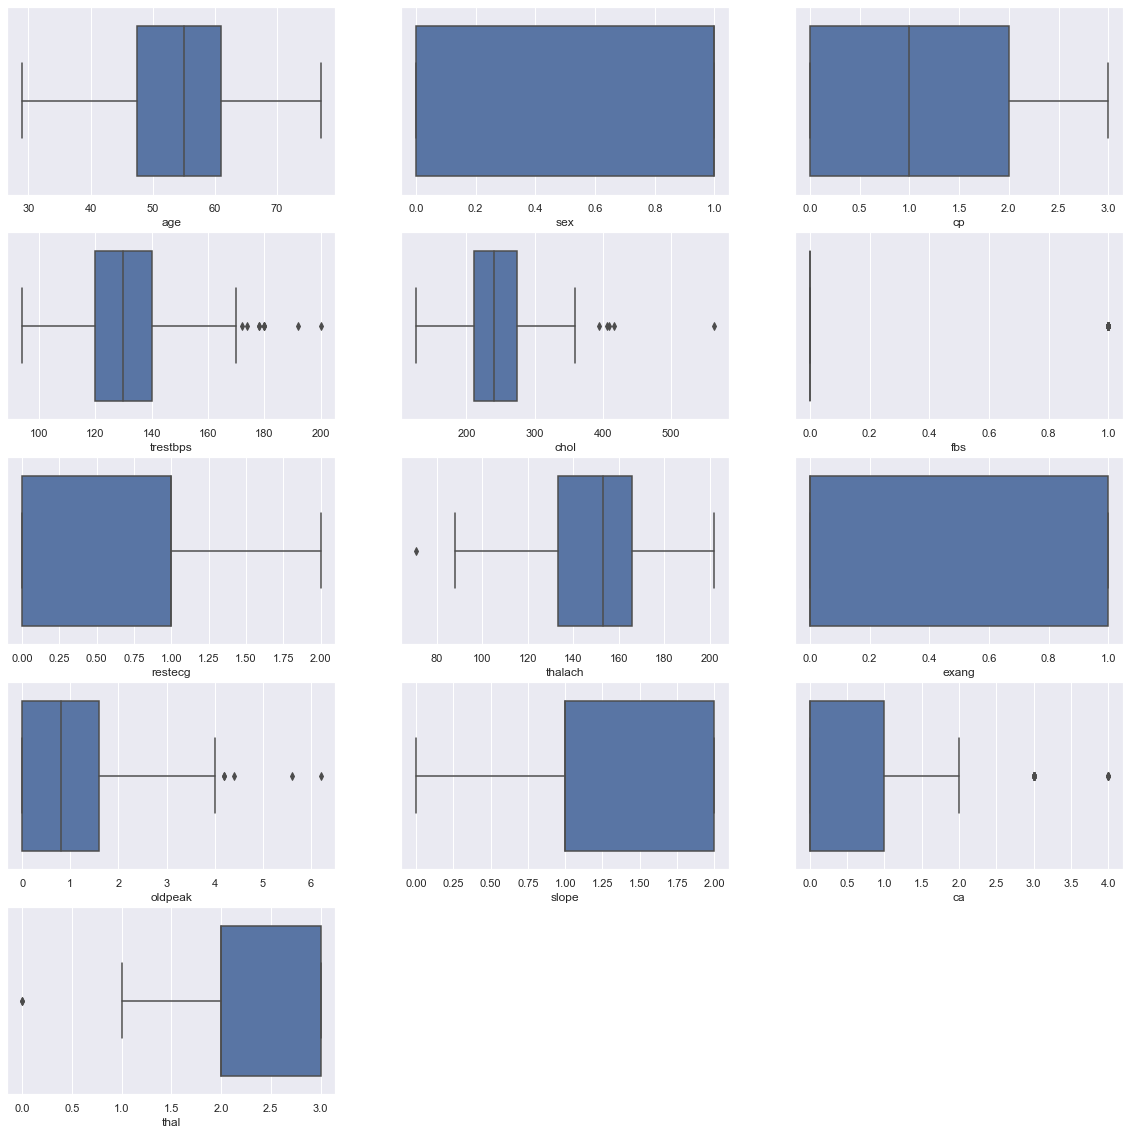

In [19]:
plt.figure(figsize=(20,20))
sns.set_theme(style="darkgrid")
plt.subplot(5,3,1)
sns.boxplot(data=df,x=df.age, hue="target")
plt.subplot(5,3,2)
sns.boxplot(data=df,x=df.sex, hue="target")
plt.subplot(5,3,3)
sns.boxplot(data=df,x=df.cp, hue="target")
plt.subplot(5,3,4)
sns.boxplot(data=df,x=df.trestbps, hue="target")
plt.subplot(5,3,5)
sns.boxplot(data=df,x=df.chol, hue="target")
plt.subplot(5,3,6)
sns.boxplot(data=df,x=df.fbs, hue="target")
plt.subplot(5,3,7)
sns.boxplot(data=df,x=df.restecg, hue="target")
plt.subplot(5,3,8)
sns.boxplot(data=df,x=df.thalach, hue="target")
plt.subplot(5,3,9)
sns.boxplot(data=df,x=df.exang, hue="target")
plt.subplot(5,3,10)
sns.boxplot(data=df,x=df.oldpeak, hue="target")
plt.subplot(5,3,11)
sns.boxplot(data=df,x=df.slope, hue="target")
plt.subplot(5,3,12)
sns.boxplot(data=df,x=df.ca, hue="target")
plt.subplot(5,3,13)
sns.boxplot(data=df,x=df.thal, hue="target");

## Comments
## In trestbps,chol,fbs, thalach, oldpeak,ca and thal column have outliers

## Correlation Matrix between columns

In [20]:
corr_mat = df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


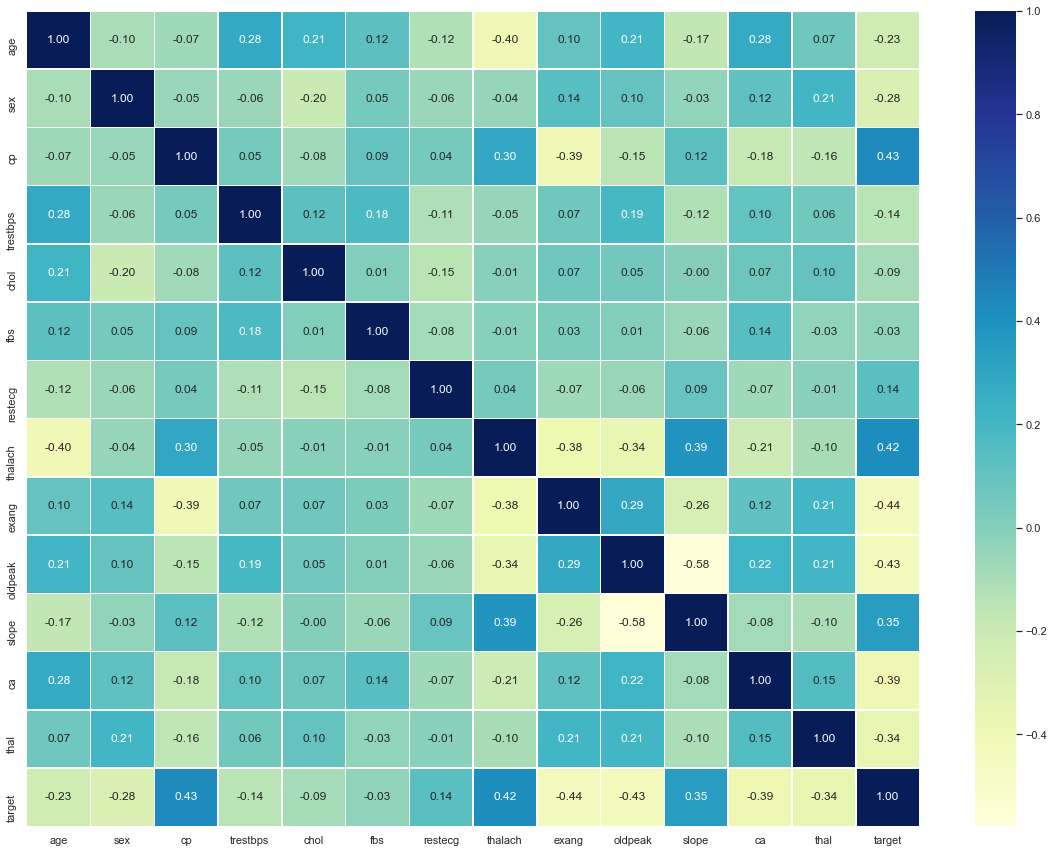

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths= 0.5,
                cmap="YlGnBu",
                fmt=".2f")

## Clearly cp, thalach is having high positive corelation with the target value,
## i.e the the value of cp and thalach inceases the value of target also increases

## Preparing Data For The Model

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Scaling The Data

In [23]:
standard_scaling = StandardScaler()
column_to_scale = ["age","trestbps","chol","thalach"]
df[column_to_scale] = standard_scaling.fit_transform(df[column_to_scale])

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


In [25]:
x=  df.drop(["target"], axis=1)
y = df["target"]

In [26]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Split Data into Training and Test Set

In [28]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [29]:
len(x_train), len(y_train)

(212, 212)

## Modeling

In [30]:
## Put all model into a dictionary

models = {"Logistic Regression":LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(),
          "SVC": LinearSVC(),
          "Naive Bayes": GaussianNB(),
          "Desicion Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier()
         }
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [31]:
score = fit_and_score(models= models,
                     x_train=x_train,
                     x_test=x_test,
                     y_train=y_train,
                     y_test=y_test)
score

{'Logistic Regression': 0.8131868131868132,
 'RandomForestClassifier': 0.8241758241758241,
 'SVC': 0.8021978021978022,
 'Naive Bayes': 0.8351648351648352,
 'Desicion Tree': 0.7362637362637363,
 'KNN': 0.8351648351648352}

## KNN and Naive Bayes perform better than other models

## Compare Scores (Initinal Score i.e Before Hyperprameter Tuning)

<AxesSubplot:>

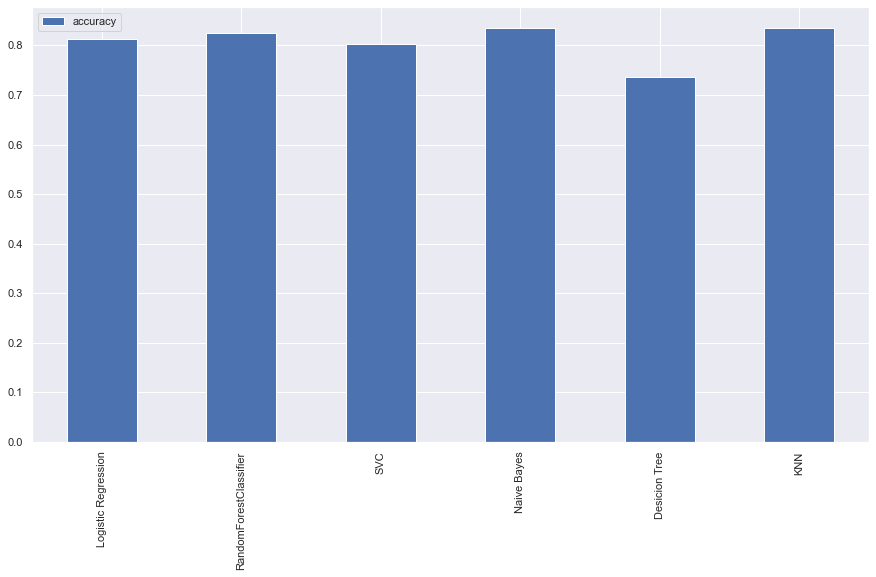

In [32]:
compare_score = pd.DataFrame(score, index=["accuracy"])
compare_score.T.plot.bar()

## Hpyerparamter Tuning For Models

### Logistic Regression 

In [33]:
## Create a parameter grid for logistic Rrgression
log_reg_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [34]:
# Tune Logistic Regression 
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(n_jobs=-1),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

In [36]:
gs_log_reg.score(x_test,y_test)

0.8351648351648352

In [37]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [38]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

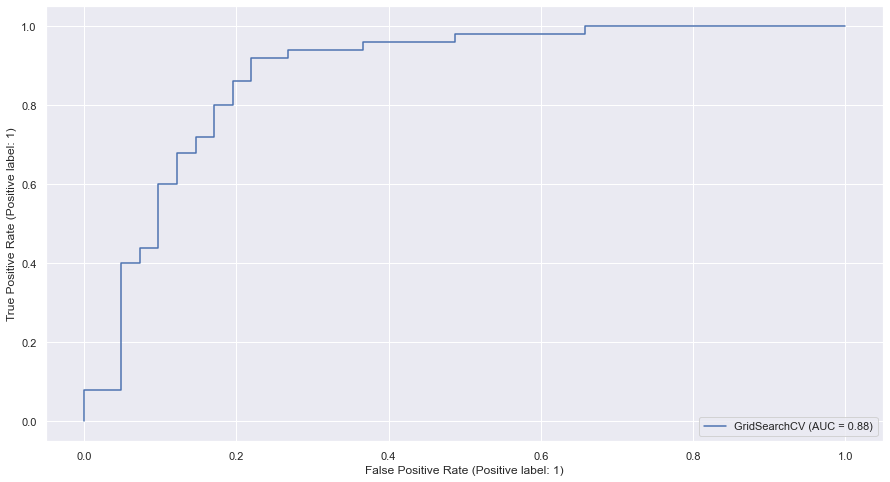

In [40]:
#Plot ROC curve
plot_roc_curve(gs_log_reg,x_test,y_test)

### RandomForestClassifier

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [42]:
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
np.random.seed(42)
gs_rf_grid = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5,
                         verbose= True,
                         n_jobs=-1)
gs_rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=True)

In [44]:
gs_rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [45]:
gs_rf_grid.score(x_test,y_test)

0.8461538461538461

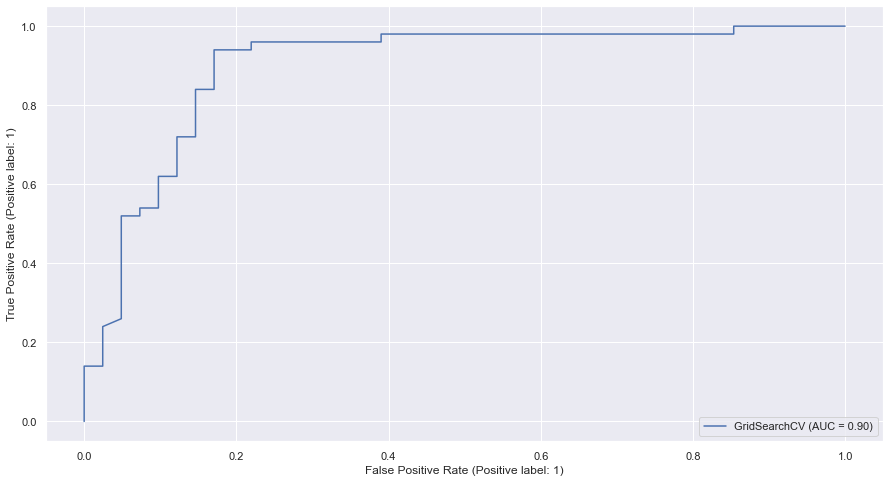

In [46]:
plot_roc_curve(gs_rf_grid, x_test, y_test)

## KNN

In [47]:
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data: 84.62%


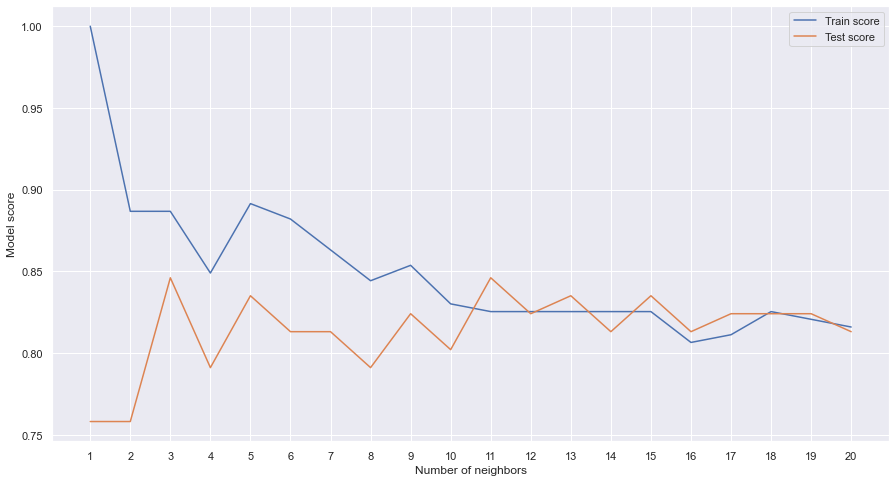

In [48]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")